In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## 1. Monty Hall problem

In [2]:
N = 3           # number of doors
M = 2           # number of closed doors
Nrep = 100000   # repetitions of the game 
consW = 0       # number of victories of the conservative player
switchW = 0     # number of victories of the switcher player
newcW = 0       # number of victories of the newcomer player

for j in range(0,Nrep):
    car_door = int(random.uniform(0,N))      
    first_choice = int(random.uniform(0,N))
    open_door = np.zeros(N-M)
    for i in range(N-M):
        open_door[i] = int(random.uniform(0,N))
        while open_door[i] == car_door or open_door[i] == first_choice or any(open_door[i]==open_door[:i]):
            open_door[i] = int(random.uniform(0,N))
# _________________________________
    cons_door = first_choice
    switch_door = int(random.uniform(0,N))
    while switch_door==first_choice or any(switch_door==open_door):
        switch_door = int(random.uniform(0,N))
    newc_door = int(random.uniform(0,N))
    while any(newc_door==open_door):
        newc_door = int(random.uniform(0,N))

    if cons_door==car_door:
        consW += 1
    if switch_door==car_door:
        switchW += 1
    if newc_door==car_door:
        newcW += 1

prob_cons = consW/Nrep *100
prob_switch = switchW/Nrep *100
prob_newc = newcW/Nrep *100

print("Doors:", N)
print("Repetitions:", Nrep)
print("\nConservative player probability =",round(prob_cons,1),"%\nSwitcher player probability     =",round(prob_switch,1),"%\nNewcomer player probability     =",round(prob_newc,1), "%")

Doors: 3
Repetitions: 100000

Conservative player probability = 33.3 %
Switcher player probability     = 66.7 %
Newcomer player probability     = 50.2 %


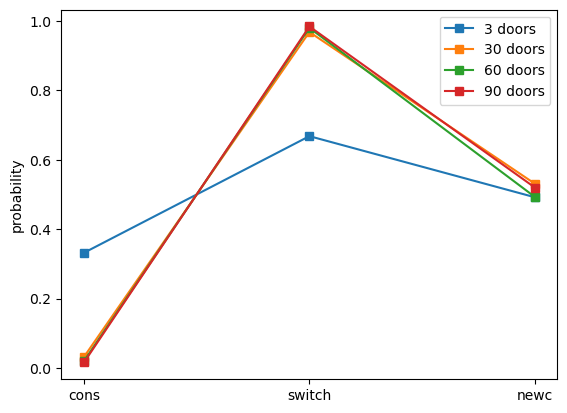

In [5]:
# Function of N

n = [3,30,60,90]
M = 2
r = 0

for N in n:
    Nrep = 1000     # repetitions of the game 
    consW = 0       # number of victories of the conservative player
    switchW = 0     # number of victories of the switcher player
    newcW = 0       # number of victories of the newcomer player

    for j in range(0,Nrep):
        car_door = int(random.uniform(0,N))      
        first_choice = int(random.uniform(0,N))
        open_door = np.zeros(N-M)
        for i in range(N-M):
            open_door[i] = int(random.uniform(0,N))
            while open_door[i] == car_door or open_door[i] == first_choice or any(open_door[i]==open_door[:i]):
                open_door[i] = int(random.uniform(0,N))
    # _________________________________
        cons_door = first_choice
        switch_door = int(random.uniform(0,N))
        while switch_door==first_choice or any(switch_door==open_door):
            switch_door = int(random.uniform(0,N))
        newc_door = int(random.uniform(0,N))
        while any(newc_door==open_door):
            newc_door = int(random.uniform(0,N))

        if cons_door==car_door:
            consW += 1
        if switch_door==car_door:
            switchW += 1
        if newc_door==car_door:
            newcW += 1

    plt.plot([1,2,3], [consW/Nrep, switchW/Nrep, newcW/Nrep], 's-', label=str(N)+' doors') 
    r+=1

plt.xticks([1,2,3],['cons', 'switch', 'newc'])
plt.ylabel('probability')
plt.legend()
plt.show()

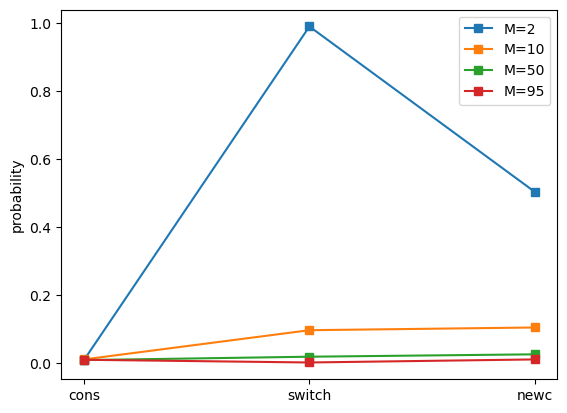

In [6]:
# Function of M

m = [2,10,50,95]
N = 100
r = 0

for M in m:
    Nrep = 1000   # repetitions of the game 
    consW = 0       # number of victories of the conservative player
    switchW = 0     # number of victories of the switcher player
    newcW = 0       # number of victories of the newcomer player

    for j in range(0,Nrep):
        car_door = int(random.uniform(0,N))      
        first_choice = int(random.uniform(0,N))
        open_door = np.zeros(N-M)
        for i in range(N-M):
            open_door[i] = int(random.uniform(0,N))
            while open_door[i] == car_door or open_door[i] == first_choice or any(open_door[i]==open_door[:i]):
                open_door[i] = int(random.uniform(0,N))
    # _________________________________
        cons_door = first_choice
        switch_door = int(random.uniform(0,N))
        while switch_door==first_choice or any(switch_door==open_door):
            switch_door = int(random.uniform(0,N))
        newc_door = int(random.uniform(0,N))
        while any(newc_door==open_door):
            newc_door = int(random.uniform(0,N))

        if cons_door==car_door:
            consW += 1
        if switch_door==car_door:
            switchW += 1
        if newc_door==car_door:
            newcW += 1

    plt.plot([1,2,3], [consW/Nrep, switchW/Nrep, newcW/Nrep], 's-', label='M='+str(M)) 
    r+=1

plt.xticks([1,2,3],['cons', 'switch', 'newc'])
plt.ylabel('probability')
plt.legend()
plt.show()

## 2. Pdf of the log

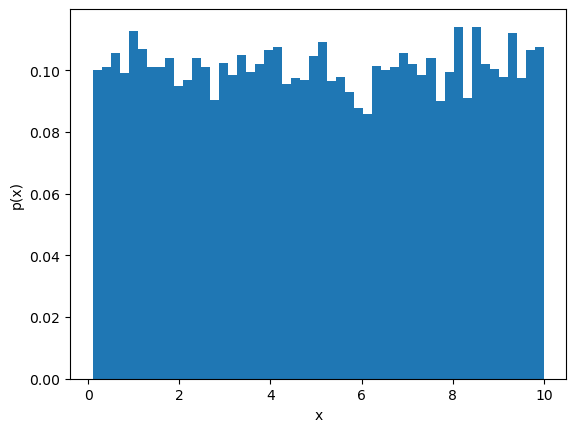

In [11]:
N = 10000
x = np.zeros(N)
for i in range(N):
    x[i] = np.random.uniform(0.1,10)

plt.hist(x,bins=50,density=True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

$p(x)=\frac{1}{10-0.1}=0.1$

$y=\log(x)$ 

$x=10^y$

$p(y)=\left|\frac{dx}{dy}\right|p(x)$

$\frac{dx}{dy}=10^y \ln10$

$p(y)=200 \cdot 10^y \ln10 $

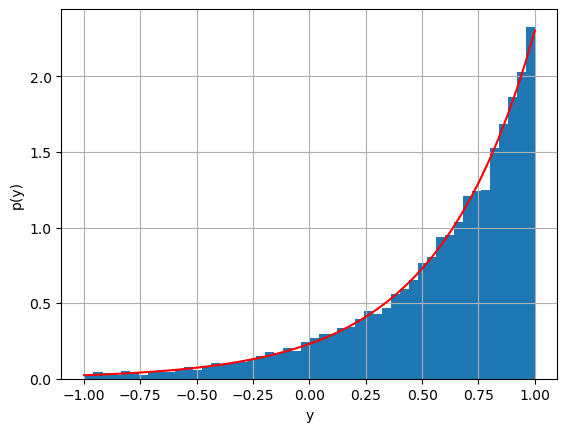

In [14]:
y = np.log10(x)
plt.hist(y, bins= 50,density=True)

ygrid = np.linspace(-1,1,50)
plt.plot(Y, 0.1*np.log(10)*10**ygrid, color='r')

plt.grid()
plt.xlabel('y')
plt.ylabel('p(y)')
plt.show()

In [20]:
print('Mean:')
print('log<x> =', np.log10(np.mean(x)))
print('<y>    =', np.mean(y))

print('\nMedian:')
print('log[M(x)] =', np.log10(np.median(x)))
print('M(y)      =', np.median(y))

Mean:
log<x> = 0.7035680382137256
<y>    = 0.5845517482914074

Median:
log[M(x)] = 0.7020142086386423
M(y)      = 0.7020142023881273


Same median, different mean. 